# SF-DAT-21 | Unit Project 2

In this project, you will implement the exploratory analysis plan developed in Unit Project 1.  This will lay the groundwork for our our first modeling exercise in Unit Project 3.

### Step 1: Load the python libraries you will need for this project

In [1]:
# imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
%matplotlib inline

### Step 2: Read in your data set

In [2]:
# read in data from source
df_raw = pd.read_csv("../../dataset/admissions.csv")
print df_raw.head()

   admit  gre   gpa  prestige
0      0  380  3.61         3
1      1  660  3.67         3
2      1  800  4.00         1
3      1  640  3.19         4
4      0  520  2.93         4


## Questions
#### Question 1. How many observations are in our dataset?


In [3]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: 400 

#### Question 2. Create a summary table.

In [4]:
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: GRE has a wider range

#### Question 4. Drop data points with missing data.


In [5]:
df_raw.isnull().sum()

admit       0
gre         2
gpa         2
prestige    1
dtype: int64

In [6]:
df_raw.dropna()

,admit,gre,gpa,prestige
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4
5,1,760,3.00,2
6,1,560,2.98,1
7,0,400,3.08,2
8,1,540,3.39,3
9,0,700,3.92,2


#### Question 5. Confirm that you dropped the correct data.  How can you tell?

In [7]:
len(df_raw.dropna())

397

Answer: 400 - 397 = 3 dropped na 

#### Question 6. Create box plots for GRE and GPA.

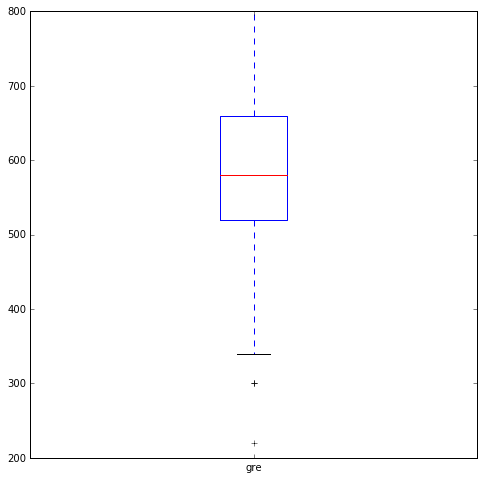

In [8]:
df_raw.gre.plot(kind='box',figsize=(8,8))

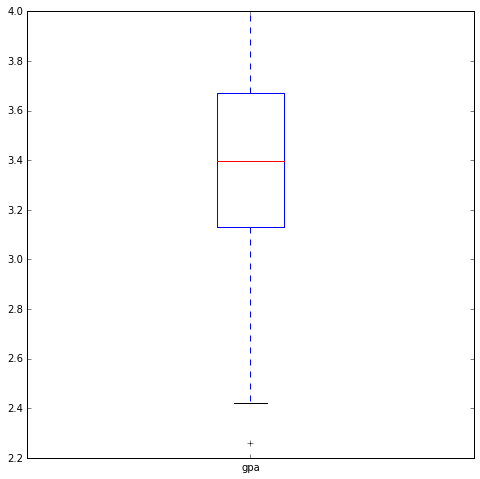

In [9]:
df_raw.gpa.plot(kind='box',figsize=(8,8))

#### Question 7. What do this plots show?

Answer: 
1) box plots show quartiles and median of the data set. the spacing between different parts of the box show the degree of dispersion and skewness of the data.
2) gre box plot shows a median score of 590 with 25th percentile at 510 and 75th percentile at 680. 350 was the lowest score. there are two outliers with scores of 300 and 210.
3) gpa box plot shows a median score of 3.4 with 25th percentile at 3.1 and 75th percentile at 3.7. 2.4 was the lowest gpa. there is one outlier with a 2.3 gpa.

#### Question 8. Describe each distribution.

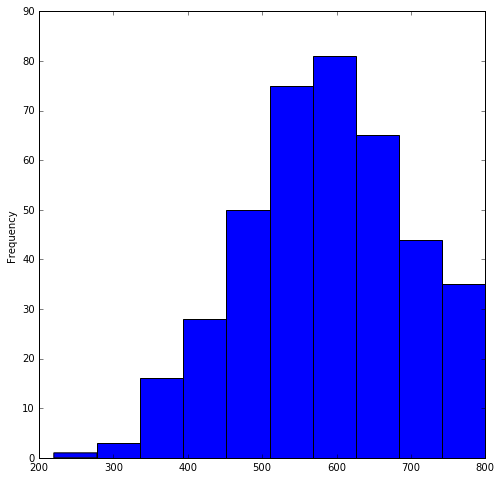

In [10]:
df_raw.gre.plot(kind='hist',figsize=(8,8))

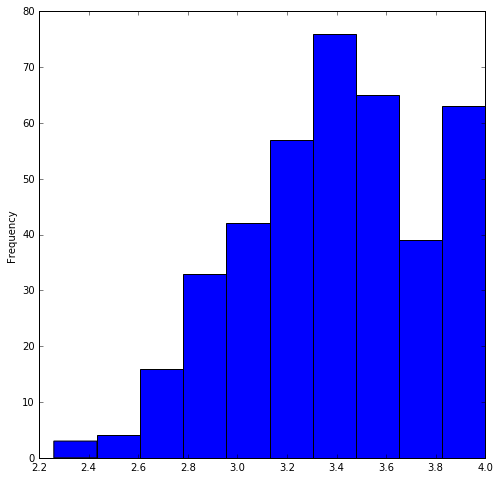

In [11]:
df_raw.gpa.plot(kind='hist',figsize=(8,8))

#### Question 9. If our model had an assumption of a normal distribution would we meet that requirement?

Answer: yes for gre, no for gpa

#### Question 10. Does this distribution need correction?  If so, why?  How?

Answer: no because the outlier is an important data point for us to understand the lowest score 

#### Question 11. Which of our variables are potentially colinear?

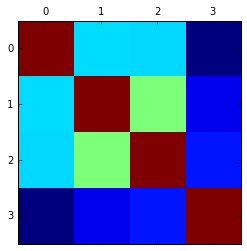

In [12]:
plt.matshow(df_raw.corr())

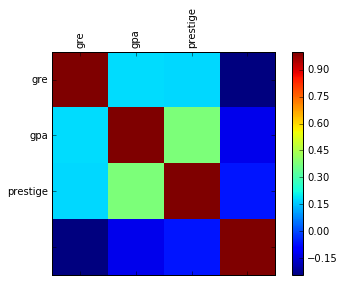

In [15]:
corr=df_raw.corr()

figure=plt.figure()
subplot=figure.add_subplot(1,1,1)
figure.colorbar(subplot.matshow(df_raw.corr()))
subplot.set_xticklabels(corr.columns,rotation=90)
subplot.set_yticklabels(corr.columns)
plt.show()

#### Question 12. What did you find?

Answer: gre and gap (0.15) / gre and prestige (0.15) both have a lower correlation than gpa and prestiage (0.5)

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of undergraduate schools.

Answer:  run summary table of data to check for missing data and data set parameters. box plot to understand median, range and outliers. histogram to find out the distribution curve of the data set. 

#### Question 14. What is your hypothesis?

Answer: we are only looking at three variables out of many facotrs that contribute to the admission rate. we need to evaluate the picture more comprehensively, bringing in other factors.

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data.

#### 2. Bonus: Log transform the skewed data.

#### 3. Advanced: Impute missing data.